In [176]:
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

In [2]:
cols =[
    'município', 
    'seção',
    'categoria',
    'graudeinstrução',
    'sexo',
    'tipomovimentação',
    'raçacor',
]
newcols=[
    'municipio',
    'secao',
    'categoria',
    'instrucao',
    'genero',
    'tipo',
    'raca'
]
a = list(string.ascii_uppercase)
genero = ['M','F','N/I']
secao = [
    'Agricultura/Pecuária',
    'Ind. Extrativas',
    'Ind. Transformação',
    'Eletricidade/Gás',
    'Água/Esgoto',
    'Construção',
    'Comércio',
    'Transporte',
    'Alimentação',
    'Informação',
    'Financeiros',
    'Imobiliárias',
    'Profissionais',
    'Administrativas',
    'Adm Pública',
    'Educação',
    'Saúde',
    'Artes/Cultura',
    'Outros Serviços',
    'Domésticos',
    'Org. Internacionais',
    'Não Identificados',
]
mon = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov']

In [3]:
jan = pd.read_csv('datasets/2020/CAGEDMOV202001.txt', sep=';', usecols=cols)
fev = pd.read_csv('datasets/2020/CAGEDMOV202002.txt', sep=';', usecols=cols)
mar = pd.read_csv('datasets/2020/CAGEDMOV202003.txt', sep=';', usecols=cols)
abr = pd.read_csv('datasets/2020/CAGEDMOV202004.txt', sep=';', usecols=cols)
mai = pd.read_csv('datasets/2020/CAGEDMOV202005.txt', sep=';', usecols=cols)
jun = pd.read_csv('datasets/2020/CAGEDMOV202006.txt', sep=';', usecols=cols)
jul = pd.read_csv('datasets/2020/CAGEDMOV202007.txt', sep=';', usecols=cols)
ago = pd.read_csv('datasets/2020/CAGEDMOV202008.txt', sep=';', usecols=cols)
set_ = pd.read_csv('datasets/2020/CAGEDMOV202009.txt', sep=';', usecols=cols)
out = pd.read_csv('datasets/2020/CAGEDMOV202010.txt', sep=';', usecols=cols)
nov = pd.read_csv('datasets/2020/CAGEDMOV202011.txt', sep=';', usecols=cols)

In [4]:
data = [jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov]
def rename(df):
    for i in range(len(df)):
    
        df[i].rename(columns=dict(zip(cols, newcols)), inplace=True)
        df[i] = df[i].loc[data[i]['municipio']==410690]
        
        df[i].loc[df[i]['genero']==1,'genero'] = 'M'
        df[i].loc[df[i]['genero']==3,'genero'] = 'F'
        df[i].loc[df[i]['genero']==9,'genero'] = 'N/I'
        
        df[i].loc[df[i]['secao']=='A','secao'] = 'Agricultura/Pecuária'
        df[i].loc[df[i]['secao']=='B','secao'] = 'Ind. Extrativas'
        df[i].loc[df[i]['secao']=='C','secao'] = 'Ind. Transformação'
        df[i].loc[df[i]['secao']=='D','secao'] = 'Eletricidade/Gás'
        df[i].loc[df[i]['secao']=='E','secao'] = 'Água/Esgoto'
        df[i].loc[df[i]['secao']=='F','secao'] = 'Construção'
        df[i].loc[df[i]['secao']=='G','secao'] = 'Comércio'
        df[i].loc[df[i]['secao']=='H','secao'] = 'Transporte'
        df[i].loc[df[i]['secao']=='I','secao'] = 'Alimentação'
        df[i].loc[df[i]['secao']=='J','secao'] = 'Informação'
        df[i].loc[df[i]['secao']=='K','secao'] = 'Financeiros'
        df[i].loc[df[i]['secao']=='L','secao'] = 'Imobiliárias'
        df[i].loc[df[i]['secao']=='M','secao'] = 'Profissionais'
        df[i].loc[df[i]['secao']=='N','secao'] = 'Administrativas'
        df[i].loc[df[i]['secao']=='O','secao'] = 'Adm Pública'
        df[i].loc[df[i]['secao']=='P','secao'] = 'Educação'
        df[i].loc[df[i]['secao']=='Q','secao'] = 'Saúde'
        df[i].loc[df[i]['secao']=='R','secao'] = 'Artes/Cultura'
        df[i].loc[df[i]['secao']=='S','secao'] = 'Outros Serviços'
        df[i].loc[df[i]['secao']=='T','secao'] = 'Domésticos'
        df[i].loc[df[i]['secao']=='U','secao'] = 'Org. Internacionais'
        df[i].loc[df[i]['secao']=='Z','secao'] = 'Não Identificados'
        
        df[i].loc[df[i]['categoria']==101,'categoria'] = 'CLT'
        df[i].loc[df[i]['categoria']==102,'categoria'] = 'Trab. Rural'
        df[i].loc[df[i]['categoria']==103,'categoria'] = 'Aprendiz'
        df[i].loc[df[i]['categoria']==104,'categoria'] = 'Doméstico'
        df[i].loc[df[i]['categoria']==105,'categoria'] = 'Contrato a Termo'
        df[i].loc[df[i]['categoria']==106,'categoria'] = 'Temporário'
        df[i].loc[df[i]['categoria']==107,'categoria'] = 'VA/Sem acordo'
        df[i].loc[df[i]['categoria']==108,'categoria'] = 'VA/Com acordo'
        df[i].loc[df[i]['categoria']==111,'categoria'] = 'Intermitente'
        df[i].loc[df[i]['categoria']==999,'categoria'] = 'Não Identificado'
        
        df[i].loc[df[i]['instrucao']==1,'instrucao'] = 'Analfabeto'
        df[i].loc[df[i]['instrucao']==2,'instrucao'] = '5º Incompleto'
        df[i].loc[df[i]['instrucao']==3,'instrucao'] = '5º Fundamental'
        df[i].loc[df[i]['instrucao']==4,'instrucao'] = '6º a 9º Fundamental'
        df[i].loc[df[i]['instrucao']==5,'instrucao'] = 'Fundamental Completo'
        df[i].loc[df[i]['instrucao']==6,'instrucao'] = 'Médio Incompleto'
        df[i].loc[df[i]['instrucao']==7,'instrucao'] = 'Médio Completo'
        df[i].loc[df[i]['instrucao']==8,'instrucao'] = 'Superior Incompleto'
        df[i].loc[df[i]['instrucao']==9,'instrucao'] = 'Superior Completo'
        df[i].loc[df[i]['instrucao']==10,'instrucao'] = 'Mestrado'
        df[i].loc[df[i]['instrucao']==11,'instrucao'] = 'Doutorado'
        df[i].loc[df[i]['instrucao']==80,'instrucao'] = 'Pós Graduação Completa'
        df[i].loc[df[i]['instrucao']==99,'instrucao'] = 'Não Identificado'
        
        df[i].loc[df[i]['raca']==1,'raca'] = 'Branca'
        df[i].loc[df[i]['raca']==2,'raca'] = 'Preta'
        df[i].loc[df[i]['raca']==3,'raca'] = 'Parda'
        df[i].loc[df[i]['raca']==4,'raca'] = 'Amarela'
        df[i].loc[df[i]['raca']==5,'raca'] = 'Indígena'
        df[i].loc[df[i]['raca']==6,'raca'] = 'Não Informada'
        df[i].loc[df[i]['raca']==9,'raca'] = 'Não Identificado'
        
        df[i].loc[data[i]['tipo'] == 10, 'descricao'] = 'ADM/Primeiro Emprego'
        df[i].loc[data[i]['tipo'] == 20, 'descricao'] = 'ADM/Reemprego'
        df[i].loc[data[i]['tipo'] == 25, 'descricao'] = 'ADM/Prazo Determinado'
        df[i].loc[data[i]['tipo'] == 31, 'descricao'] = 'DES/Sem Justa Causa'
        df[i].loc[data[i]['tipo'] == 32, 'descricao'] = 'DES/Justa Causa'
        df[i].loc[data[i]['tipo'] == 33, 'descricao'] = 'DES/Culpa Recíproca'
        df[i].loc[data[i]['tipo'] == 35, 'descricao'] = 'ADM/Reintegração'
        df[i].loc[data[i]['tipo'] == 40, 'descricao'] = 'DES/A pedido'
        df[i].loc[data[i]['tipo'] == 43, 'descricao'] = 'DES/Término de Contrato Determinado'
        df[i].loc[data[i]['tipo'] == 45, 'descricao'] = 'DES/Término de Contrato'
        df[i].loc[data[i]['tipo'] == 50, 'descricao'] = 'DES/Aposentadoria'
        df[i].loc[data[i]['tipo'] == 60, 'descricao'] = 'DES/Morte'
        df[i].loc[data[i]['tipo'] == 70, 'descricao'] = 'ADM/Transferência'
        df[i].loc[data[i]['tipo'] == 80, 'descricao'] = 'DES/Transferência'
        df[i].loc[data[i]['tipo'] == 90, 'descricao'] = 'DES/Acordo'
        df[i].loc[data[i]['tipo'] == 98, 'descricao'] = 'DES/Tipo Ignorado'
        df[i].loc[data[i]['tipo'] == 99, 'descricao'] = 'DES/Não Identificado'

In [5]:
rename(data)

## Dados de Admissões

In [164]:
adm = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].shape[0]
    adm.append(d)



In [165]:
adm = pd.DataFrame(adm, index=mon)


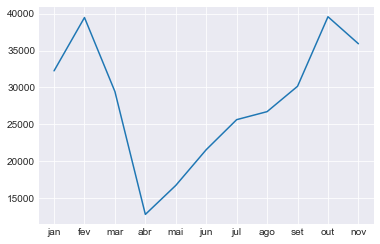

In [220]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(adm)
    plt.show()

## Dados de Desligamentos

In [192]:
des = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].shape[0]
    des.append(d)


In [193]:
des

[26336, 29711, 40489, 32906, 25380, 21474, 22344, 23776, 26270, 27959, 27178]

In [194]:
des = pd.DataFrame(des, index=mon)


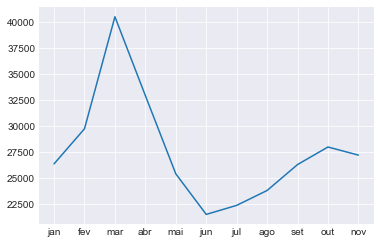

In [219]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(des)
    plt.show()

# Admissões/Desligamentos

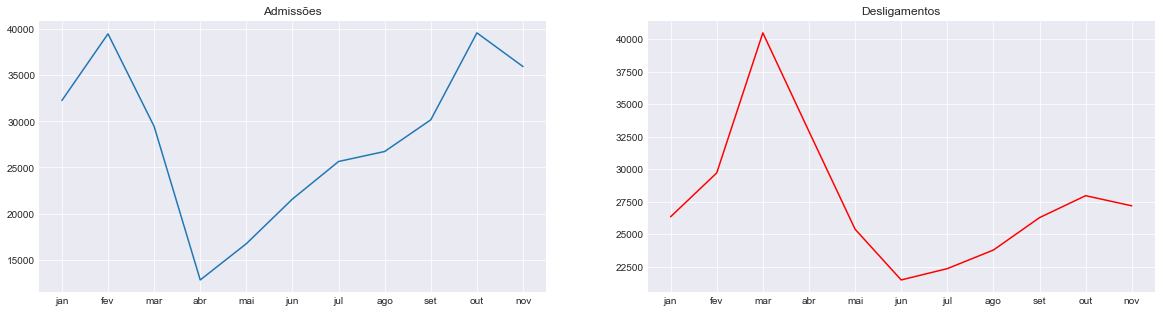

In [225]:
with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(1, 2, figsize = (20, 5))

    axes[0].plot(adm)
    axes[0].set_title("Admissões")
    #axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

    axes[1].plot(des, color='r')
    axes[1].axis('tight')
    axes[1].set_title("Desligamentos")
    #axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

    plt.show()

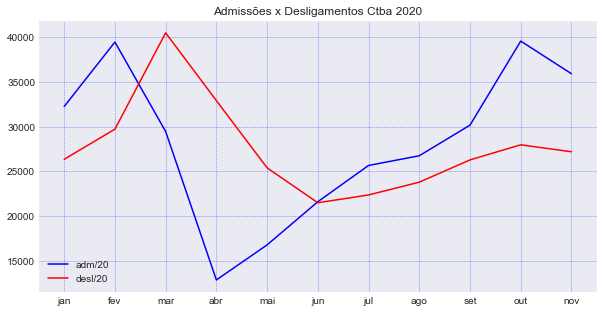

In [211]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(adm, color="b")
    ax.plot(des, color="r")
    ax.set_title("Admissões x Desligamentos Ctba 2020")
    ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.legend(('adm/20', 'desl/20'))
    #plt.rcParams['figure.figsize'] = (8,5)
    plt.show();

In [15]:
data[0]

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa
...,...,...,...,...,...,...,...,...
2617203,410690,Alimentação,CLT,Fundamental Completo,M,20,Branca,ADM/Reemprego
2617230,410690,Administrativas,Temporário,Médio Completo,M,43,Não Informada,DES/Término de Contrato Determinado
2617252,410690,Ind. Transformação,Não Identificado,Médio Completo,F,20,Branca,ADM/Reemprego
2617268,410690,Administrativas,Contrato a Termo,Médio Completo,M,40,Branca,DES/A pedido


In [173]:
adm_desc = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['descricao']).size()
    adm_desc.append(a)
    

In [174]:
adm_desc = pd.DataFrame(adm_desc, index=mon)
adm_desc

descricao,ADM/Prazo Determinado,ADM/Primeiro Emprego,ADM/Reemprego,ADM/Reintegração
jan,113,1664,30459,12
fev,90,2023,37322,23
mar,48,1421,27957,22
abr,40,566,12202,25
mai,111,714,15902,29
jun,102,642,20811,32
jul,469,884,24271,24
ago,87,1004,25618,23
set,25,1076,29030,28
out,50,1540,37953,22


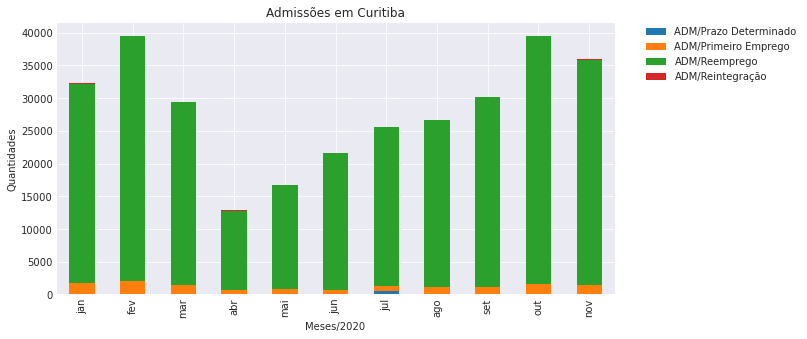

In [235]:
with plt.style.context('seaborn-darkgrid'):
    adm_desc.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title("Admissões em Curitiba")
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades");

In [186]:
des_desc = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['descricao']).size()
    des_desc.append(d)
    

In [187]:
des_desc = pd.DataFrame(des_desc, index=mon)
des_desc = des_desc.drop(columns='DES/Tipo Ignorado')
des_desc

,DES/A pedido,DES/Acordo,DES/Aposentadoria,DES/Culpa Recíproca,DES/Justa Causa,DES/Morte,DES/Não Identificado,DES/Sem Justa Causa,DES/Término de Contrato,DES/Término de Contrato Determinado
jan,9148.0,534.0,11.0,28.0,487.0,55.0,263.0,10100.0,487.0,5223.0
fev,9493.0,654.0,15.0,22.0,424.0,62.0,239.0,12178.0,789.0,5835.0
mar,8286.0,727.0,13.0,30.0,413.0,70.0,428.0,17893.0,403.0,12226.0
abr,4080.0,469.0,5.0,79.0,332.0,72.0,70.0,19518.0,232.0,8048.0
mai,3809.0,344.0,7.0,18.0,294.0,68.0,59.0,15420.0,252.0,5109.0
jun,5026.0,359.0,3.0,16.0,268.0,79.0,140.0,11474.0,129.0,3979.0
jul,6158.0,368.0,4.0,20.0,288.0,134.0,76.0,10914.0,108.0,4274.0
ago,7346.0,480.0,10.0,16.0,263.0,117.0,95.0,9757.0,72.0,5619.0
set,8825.0,686.0,9.0,18.0,340.0,120.0,101.0,9216.0,243.0,6712.0
out,10444.0,600.0,21.0,12.0,322.0,74.0,189.0,10253.0,212.0,5832.0


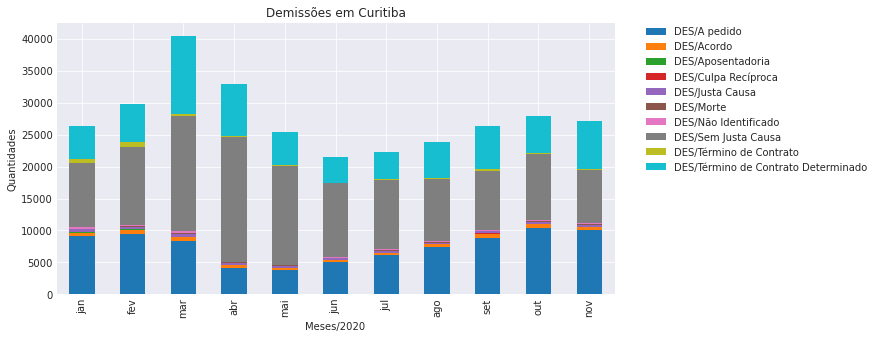

In [232]:
with plt.style.context('seaborn-darkgrid'):
    des_desc.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title("Demissões em Curitiba")
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades");

# Distribuição por gênero
---

In [16]:
data[0]

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa
...,...,...,...,...,...,...,...,...
2617203,410690,Alimentação,CLT,Fundamental Completo,M,20,Branca,ADM/Reemprego
2617230,410690,Administrativas,Temporário,Médio Completo,M,43,Não Informada,DES/Término de Contrato Determinado
2617252,410690,Ind. Transformação,Não Identificado,Médio Completo,F,20,Branca,ADM/Reemprego
2617268,410690,Administrativas,Contrato a Termo,Médio Completo,M,40,Branca,DES/A pedido


# Admissões por gênero
---

In [6]:
gene_adm = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['genero'].value_counts()
    gene_adm.append(a)


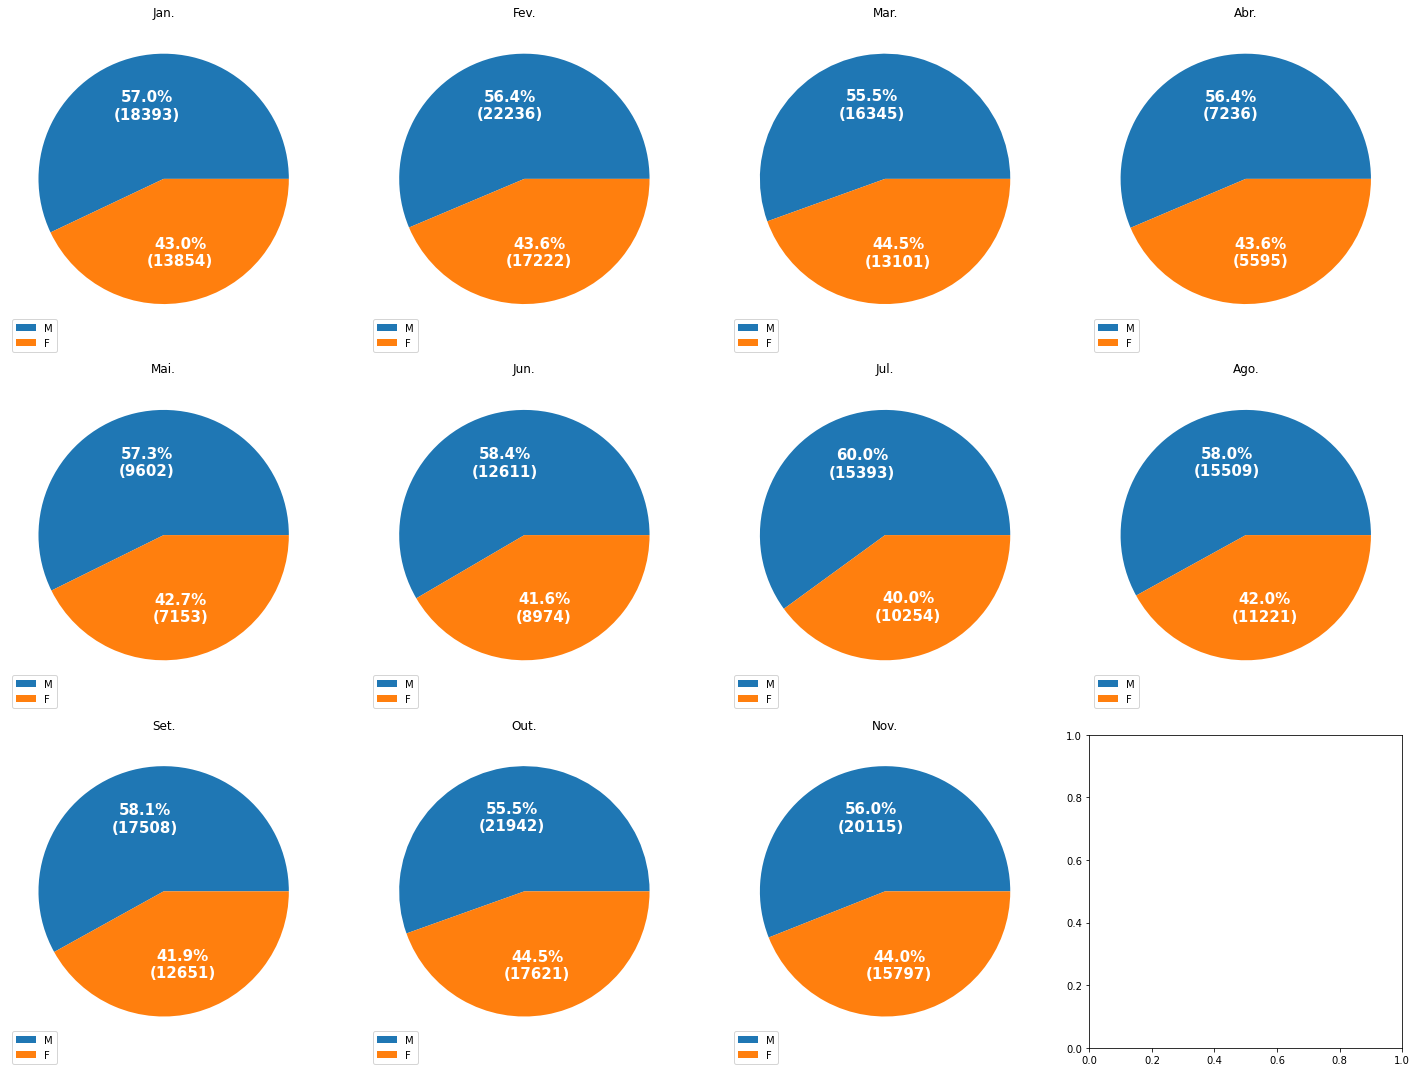

In [259]:
fig, axs = plt.subplots(3,4, figsize=(20,15), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def pie(ax, data, mo):
    labels='M','F'
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    plt.setp(autotexts, size=15, weight="bold")
    ax.set_title(mo)
    ax.legend(wedges, labels, loc="center left",bbox_to_anchor=(0, 0, 0, 0))

    
pie(axs[0,0],gene_adm[0],"Jan.")
pie(axs[0,1],gene_adm[1],"Fev.")
pie(axs[0,2],gene_adm[2],"Mar.")
pie(axs[0,3],gene_adm[3],"Abr.")
pie(axs[1,0],gene_adm[4],"Mai.")
pie(axs[1,1],gene_adm[5],"Jun.")
pie(axs[1,2],gene_adm[6],"Jul.")
pie(axs[1,3],gene_adm[7],"Ago.")
pie(axs[2,0],gene_adm[8],"Set.")
pie(axs[2,1],gene_adm[9],"Out.")
pie(axs[2,2],gene_adm[10],"Nov.")


plt.tight_layout()
plt.show()

# Demissões po gênero
---

In [247]:
gene_des = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['genero'].value_counts()
    gene_des.append(d)


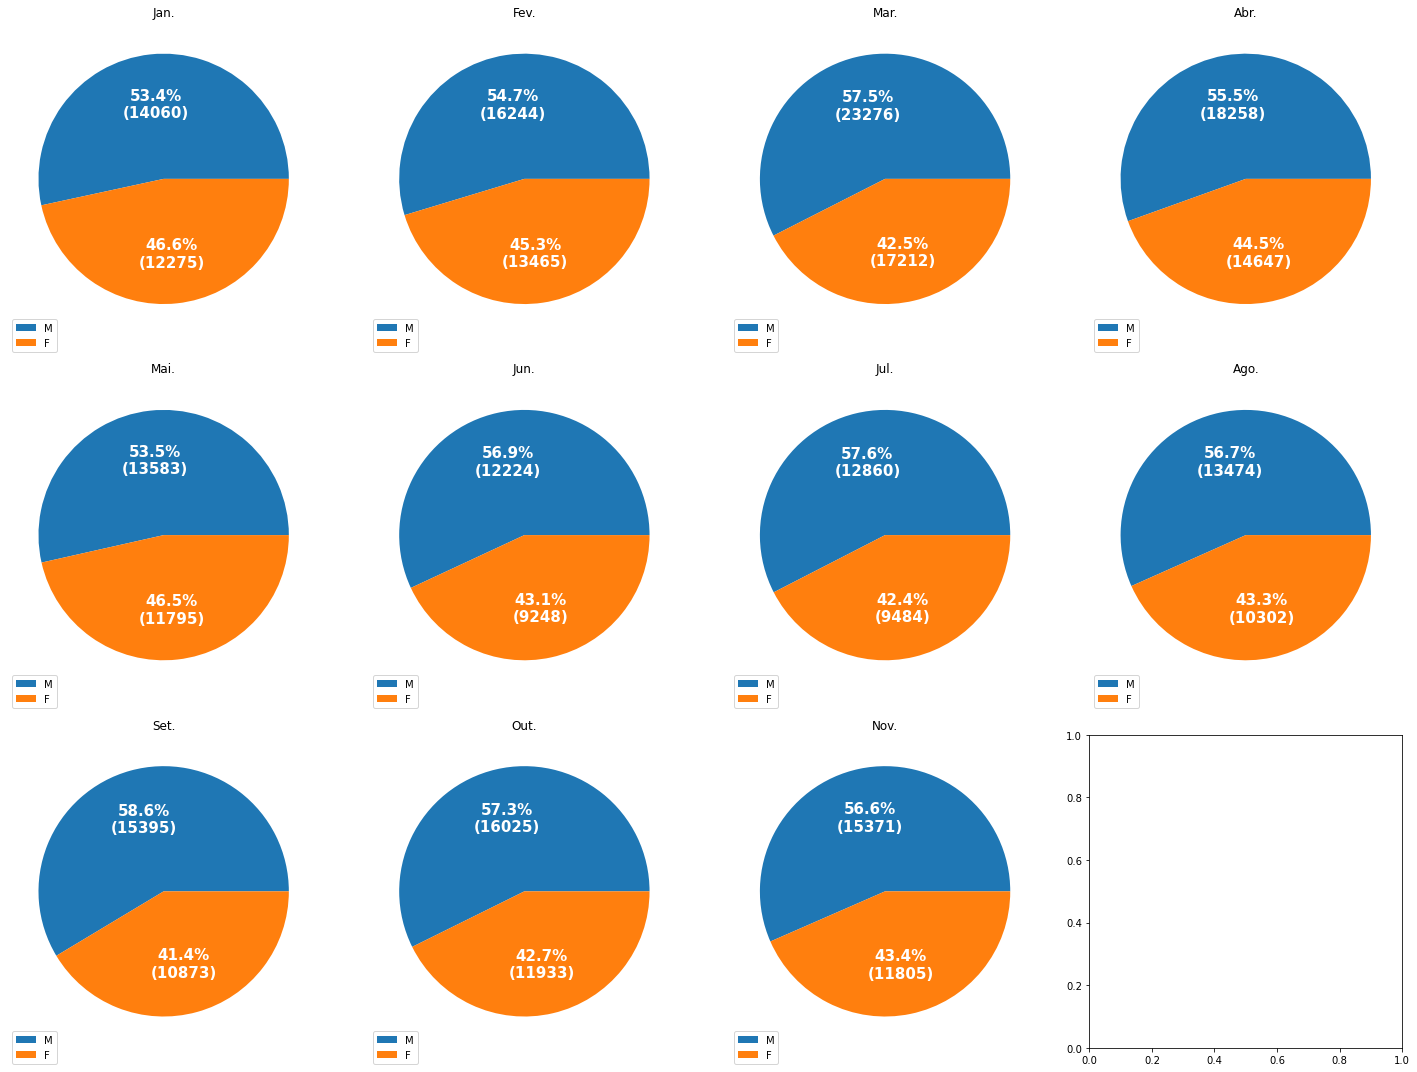

In [255]:
fig, axs = plt.subplots(3,4, figsize=(20,15), subplot_kw=dict(aspect="equal"))
pie(axs[0,0],gene_des[0],"Jan.")
pie(axs[0,1],gene_des[1],"Fev.")
pie(axs[0,2],gene_des[2],"Mar.")
pie(axs[0,3],gene_des[3],"Abr.")
pie(axs[1,0],gene_des[4],"Mai.")
pie(axs[1,1],gene_des[5],"Jun.")
pie(axs[1,2],gene_des[6],"Jul.")
pie(axs[1,3],gene_des[7],"Ago.")
pie(axs[2,0],gene_des[8],"Set.")
pie(axs[2,1],gene_des[9],"Out.")
pie(axs[2,2],gene_des[10],"Nov.")

plt.tight_layout()
plt.show()